In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [84]:
def sigmoid(x, betas):
    z = x.dot(betas)
    z = np.clip(z, -500,500)    #to handle overflow لانى بقيت فى منطقة التأكد خلاص مش هحتاج اشوف  الباقى تانى 
    return 1 / (1+np.exp(-z))

def cost_function(x, y, betas):
    m = x.shape[0]
    x_bias = np.ones((m, 1))
    x = np.c_[x_bias, x]
    y_hat = sigmoid(x, betas)
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)   # to handle log (0)
    loss = -1/m * (y.T.dot(  np.log(y_hat)) + (1-y).T.dot( np.log (1-y_hat)))
    return loss

def gradient_descent(alpha, iterations, x, y):
    m = x.shape[0]
    x_bias = np.ones((m,1))
    x = np.c_[x_bias, x]
    k = x.shape[1]
    betas = np.random.randn(k,1)
    for i in range(iterations):
        y_hat = sigmoid(x, betas)
        betas = betas - alpha/ m * (x.T.dot(y_hat - y))
    return betas

def log_likelihood(y, y_hat):
    return y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log (1-y_hat))

def r_squared(ll_total, ll_fit):
    return (ll_total - ll_fit) / ll_total
    
def predict (x, betas):
    m = x.shape[0]
    x_bias = np.ones((m, 1))
    x = np.c_[x_bias, x]
    return sigmoid(x, betas)

In [85]:
data = pd.read_csv("Social_Network_Ads.csv")   # customer will buy or not 
data 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [86]:
scaler = StandardScaler()
x = data[["Age", "EstimatedSalary"]]
x = scaler.fit_transform(x)
y = data[["Purchased"]]

In [87]:
betas = gradient_descent(alpha=0.01 , iterations=10000 , x = x , y = y)
betas 

array([[-1.11131168],
       [ 2.37519843],
       [ 1.18885285]])

In [88]:
y_hat = predict(x,betas)
print(cost_function(x , y ,betas))

                  0
Purchased  0.346405


In [89]:
y_hat = predict(x, betas)
ll_fit = log_likelihood(y,y_hat)
y_hat_total = np.ones_like(y_hat) * y.mean().values    # array of mean >> (1*maean(y))
ll_total = log_likelihood(y, y_hat_total)

In [90]:
score = r_squared(ll_total , ll_fit)
print(score)      #  ة القيمة مش احسن حاجة عشان فى تداخل او تقاطع كبير بين الداتا

                  0
Purchased  0.468677


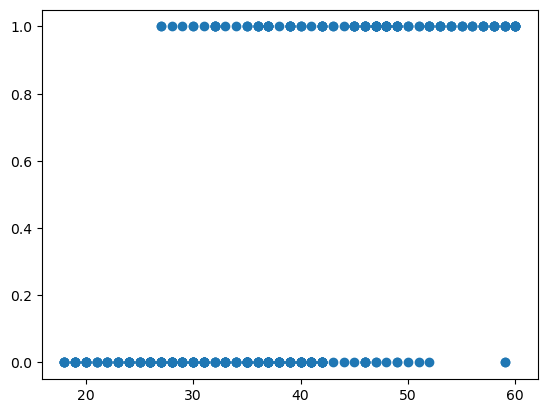

In [91]:
x = data["Age"]
y = data["Purchased"]
plt.scatter(x,y)
# واضح من الرسم دا ان فى تقاطع بين نقط كتير فى الداتا 